<a href="https://colab.research.google.com/github/Leiryanny/Projetos-de-ETL-Analise-de-Dados/blob/main/classifica%C3%A7%C3%A3oIMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o Projeto

**Descrição:**

Este projeto visa realizar a Extração, Transformação e Carga (ETL) de um conjunto de dados contendo informações sobre características físicas de indivíduos, como altura, peso, idade e gênero. Os dados foram inicialmente obtidos do site Kaggle e armazenados no Google Drive no formato CSV.

Este conjunto de dados contém informações anonimizadas sobre altura, peso, idade e gênero de 10.000 indivíduos, distribuídos igualmente entre homens (5.000 amostras) e mulheres (5.000 amostras).

A base original inclui as seguintes colunas:

- Gênero: O gênero do indivíduo (Masculino/Feminino)
- Altura: A altura do indivíduo em centímetros
- Peso: O peso do indivíduo em quilogramas
- Idade: A idade do indivíduo em anos

**Processo de ETL:**

Os dados foram extraídos do Google Drive no formato CSV. Durante a fase de transformação, o dataset passou por um processo abrangente que incluiu limpeza, tratamento de dados ausentes, arredondamentos, verificações de inconsistências, traduções para o português, cálculo do Índice de Massa Corporal (IMC) para cada indivíduo, renomeação de colunas etc. Esse processo foi realizado utilizando as bibliotecas Pandas e NumPy.

**Validação de Dados:**

Para assegurar a integridade e qualidade dos dados tratados, foram aplicadas técnicas de validação utilizando a biblioteca Pandera.

**Armazenamento e Disponibilidade:**

Após o processo de ETL, os dados foram armazenados novamente no Google Drive em formatos Google Sheets e CSV, proporcionando uma plataforma acessível para compartilhamento e análises posteriores.

**Análise e Visualização:**

Para uma melhor compreensão dos dados, foram realizadas análises estatísticas exploratórias utilizando a biblioteca Matplotlib. As análises incluíram a distribuição por gênero e a classificação de IMC dos indivíduos, apresentadas através de visualizações gráficas claras e informativas.


# Extração - Google Drive

####**Bibliotecas**

In [49]:
# Autenticação no Google Colab
from google.colab import auth

# Interação com o Google Drive
from google.colab import drive

# Manipulação de dados
import pandas as pd
import numpy as np

# Validadção do dataset com Pandera
!pip install pandera -q
import pandera as pa

# Gráficos
import matplotlib.pyplot as plt

# Interação com o Google Sheets
import gspread
from google.auth import default

####**Autenticação**

In [50]:
auth.authenticate_user()

####**Importação do Dataset**

In [51]:
# Montagem dkdo drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Definindo o caminho do arquivo
arquivo = '/content/drive/MyDrive/datasets/Gender_Classification_Data.csv'

In [53]:
# Salvando em um dataframe
dataset = pd.read_csv(arquivo)

In [54]:
# Verificando o dataset
dataset

,gender,height,weight,age
0,female,166.835558,64.238722,38
1,female,166.321934,67.165489,65
2,male,193.424782,89.342636,67
3,female,167.027904,67.637666,55
4,male,191.822253,93.985117,29
...,...,...,...,...
9995,female,159.231550,64.338891,33
9996,female,166.681690,67.197533,30
9997,female,163.973116,74.565143,65
9998,female,168.363149,72.459247,24


## Tratamento

####**Tipos de dados**

In [55]:
# Verificando tipos de dados
dataset.dtypes

gender     object
height    float64
weight    float64
age         int64
dtype: object

####**Cabeçalho**

In [56]:
# Renomeando as colunas
dataset.rename(columns={
    'gender': 'Gênero',
    'age': 'Idade (anos)',
    'height': 'Altura (cm)',
    'weight': 'Peso (kg)'
}, inplace=True)

# Verificando o cabeçalho
dataset.head()

,Gênero,Altura (cm),Peso (kg),Idade (anos)
0,female,166.835558,64.238722,38
1,female,166.321934,67.165489,65
2,male,193.424782,89.342636,67
3,female,167.027904,67.637666,55
4,male,191.822253,93.985117,29


####**Dados Ausentes**

In [57]:
dataset.isnull().sum()

Gênero          0
Altura (cm)     0
Peso (kg)       0
Idade (anos)    0
dtype: int64

In [58]:
dataset.isna().sum()

Gênero          0
Altura (cm)     0
Peso (kg)       0
Idade (anos)    0
dtype: int64

####**Verificação de Inconsistências**

In [59]:
# Máximo coluna 'Idade'
dataset['Idade (anos)'].max()

69

In [60]:
# Mínimo coluna 'Idade'
dataset['Idade (anos)'].min()

18

In [61]:
# Máximo coluna 'Altura'
dataset['Altura (cm)'].max()

217.48366394505427

In [62]:
# Mínimo coluna 'Altura'
dataset['Altura (cm)'].min()

144.48110892352744

####**Traduções**

In [63]:
# Dicionário de tradução para a coluna 'Gênero'
tradução_genero = {
    "female": "Feminino",
    "male": "Masculino"
}
# Traduzindo a coluna 'Gênero'
dataset["Gênero"] = dataset["Gênero"].map(tradução_genero)

In [64]:
# Verificando dados únicos na coluna gênero
dataset["Gênero"].unique()

array(['Feminino', 'Masculino'], dtype=object)

####**Arredondamentos**

In [65]:
# Removendo as casas decimais da coluna 'Altura' convertendo para inteiro
dataset["Altura (cm)"] = dataset['Altura (cm)'].astype(int)

In [66]:
# Arredondando os valores da coluna 'Peso' para 1 casa decimal
dataset["Peso (kg)"] = dataset["Peso (kg)"].round(1)

# Verificando o dataset
dataset.head()

,Gênero,Altura (cm),Peso (kg),Idade (anos)
0,Feminino,166,64.2,38
1,Feminino,166,67.2,65
2,Masculino,193,89.3,67
3,Feminino,167,67.6,55
4,Masculino,191,94.0,29


####**Cálculos**

In [67]:
# Transformando a coluna 'Altura' para metros
dataset["Altura (cm)"] = dataset["Altura (cm)"] / 100

In [68]:
dataset.head()

,Gênero,Altura (cm),Peso (kg),Idade (anos)
0,Feminino,1.66,64.2,38
1,Feminino,1.66,67.2,65
2,Masculino,1.93,89.3,67
3,Feminino,1.67,67.6,55
4,Masculino,1.91,94.0,29


In [69]:
# Renomeando a coluna 'Altura'
dataset.rename(columns={
    'Altura (cm)': 'Altura (m)'
}, inplace=True)

In [70]:
dataset.head()

,Gênero,Altura (m),Peso (kg),Idade (anos)
0,Feminino,1.66,64.2,38
1,Feminino,1.66,67.2,65
2,Masculino,1.93,89.3,67
3,Feminino,1.67,67.6,55
4,Masculino,1.91,94.0,29


In [71]:
# Calculando o IMC com 1 casa decimal
dataset["IMC (kg/m²)"] = round(dataset["Peso (kg)"] / (dataset["Altura (m)"] ** 2), 1)

In [72]:
dataset.head()

,Gênero,Altura (m),Peso (kg),Idade (anos),IMC (kg/m²)
0,Feminino,1.66,64.2,38,23.3
1,Feminino,1.66,67.2,65,24.4
2,Masculino,1.93,89.3,67,24.0
3,Feminino,1.67,67.6,55,24.2
4,Masculino,1.91,94.0,29,25.8


In [73]:
# Arredondando os valores da coluna 'IMC' para 1 casa decimal
dataset["IMC (kg/m²)"] = dataset["IMC (kg/m²)"].round(1)

In [74]:
dataset.head()

,Gênero,Altura (m),Peso (kg),Idade (anos),IMC (kg/m²)
0,Feminino,1.66,64.2,38,23.3
1,Feminino,1.66,67.2,65,24.4
2,Masculino,1.93,89.3,67,24.0
3,Feminino,1.67,67.6,55,24.2
4,Masculino,1.91,94.0,29,25.8


In [75]:
# Função para classificar o IMC
def classificar_imc(imc):
    if imc < 18.5:
        return "Baixo peso"
    elif imc >= 18.5 and imc <= 24.9:
        return "Peso normal"
    elif imc >= 25 and imc <= 29.9:
        return "Sobrepeso"
    elif imc >= 30 and imc <= 34.9:
        return "Obesidade grau I"
    elif imc >= 35 and imc <= 39.9:
        return "Obesidade grau II"
    elif imc >= 40:
        return "Obesidade grau III"

In [76]:
# Aplicar a função de classificação ao DataFrame
dataset["Classificação"] = dataset["IMC (kg/m²)"].apply(classificar_imc)

In [77]:
dataset.head()

,Gênero,Altura (m),Peso (kg),Idade (anos),IMC (kg/m²),Classificação
0,Feminino,1.66,64.2,38,23.3,Peso normal
1,Feminino,1.66,67.2,65,24.4,Peso normal
2,Masculino,1.93,89.3,67,24.0,Peso normal
3,Feminino,1.67,67.6,55,24.2,Peso normal
4,Masculino,1.91,94.0,29,25.8,Sobrepeso


In [78]:
# Verificação de dados únicos na coluna 'Classificação'
dataset["Classificação"].unique()

array(['Peso normal', 'Sobrepeso', 'Obesidade grau I', 'Baixo peso',
       'Obesidade grau II', 'Obesidade grau III'], dtype=object)

In [79]:
# Tipos de dados novamente
dataset.dtypes

Gênero            object
Altura (m)       float64
Peso (kg)        float64
Idade (anos)       int64
IMC (kg/m²)      float64
Classificação     object
dtype: object

####**Tabelas**

In [80]:
# Gênero Feminino
feminino = dataset[dataset['Gênero'] == 'Feminino']
feminino.head()

,Gênero,Altura (m),Peso (kg),Idade (anos),IMC (kg/m²),Classificação
0,Feminino,1.66,64.2,38,23.3,Peso normal
1,Feminino,1.66,67.2,65,24.4,Peso normal
3,Feminino,1.67,67.6,55,24.2,Peso normal
5,Feminino,1.59,74.1,40,29.3,Sobrepeso
6,Feminino,1.67,82.3,62,29.5,Sobrepeso


In [81]:
# Gênero Masculino
masculino = dataset[dataset['Gênero'] == 'Masculino']
masculino.head()

,Gênero,Altura (m),Peso (kg),Idade (anos),IMC (kg/m²),Classificação
2,Masculino,1.93,89.3,67,24.0,Peso normal
4,Masculino,1.91,94.0,29,25.8,Sobrepeso
10,Masculino,1.85,81.2,28,23.7,Peso normal
14,Masculino,1.89,83.2,53,23.3,Peso normal
15,Masculino,1.92,92.3,23,25.0,Sobrepeso


####**Validação do Dataframe**

In [82]:
# Definição do esquema de validação com Pandera
schema = pa.DataFrameSchema({
    'Gênero': pa.Column(pa.String),
    'Altura (m)': pa.Column(pa.Float),
    'Peso (kg)': pa.Column(pa.Float),
    'Idade (anos)': pa.Column(pa.Int),
    'IMC (kg/m²)': pa.Column(pa.Float),
    'Classificação': pa.Column(pa.String)
})

# Validar o DataFrame com base no esquema
try:
    schema.validate(dataset)
    print("Validação bem-sucedida!")
except pa.errors.SchemaError as e:
    print(f"Erro de validação:\n{e}")

Validação bem-sucedida!


# Carregamento

In [83]:
# Definições das pastas do Google Drive
pasta = 'exploratory-data-analysis'
sub_pasta = 'tratados'

In [84]:
# Carregamento - csv
dataset.to_csv(f'/content/drive/MyDrive/{pasta}/{sub_pasta}/Gender_Classification_tratado.csv', index=False)

In [85]:
# Carregamento - google sheets

In [86]:
creds, _ = default()
gc = gspread.authorize(creds)

In [87]:
# Acessar planilha que vai receber os dados
planilha_IMC = gc.open('IMC_Tratado')

In [88]:
# Acessar a guia da planilha usando o método worksheet
tabela_IMC = planilha_IMC.worksheet('Página1')

In [89]:
# Carregamento
tabela_IMC.update([dataset.columns.values.tolist()] + dataset.values.tolist())

{'spreadsheetId': '1YqnYGa7jFoUlntJrPt8qAM0057IxWieFxl862MNouZ4',
 'updatedRange': "'Página1'!A1:F10001",
 'updatedRows': 10001,
 'updatedColumns': 6,
 'updatedCells': 60006}

# Análise de Dados

####**Distribuição por Gênero**

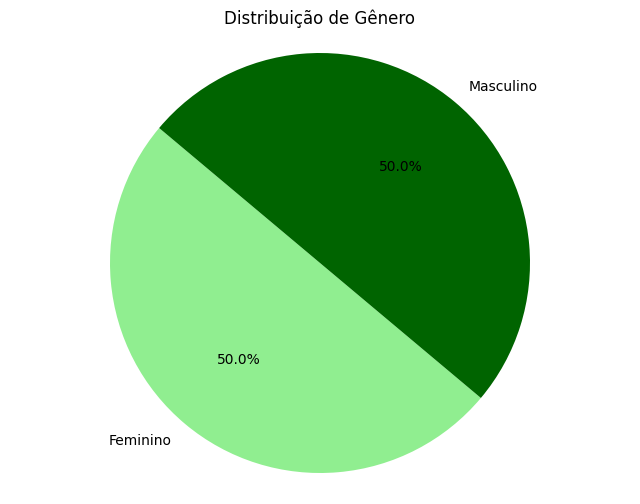

In [90]:
# Gráfico de pizza para relação entre IMC e Idade
contagem_genero = dataset["Gênero"].value_counts()

# Cores para cada categoria de gênero
cores = ['lightgreen', 'darkgreen']

# Configurações do gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(contagem_genero, labels=contagem_genero.index, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Gênero')
plt.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo
plt.show()

####**Classificação do IMC por Gênero**

In [91]:
# Contagem de valores para a classificação de IMC no gênero feminino
contagem_classificacao_feminino = feminino['Classificação'].value_counts()

In [92]:
# Ordenar as contagens do maior para o menor
contagem_classificacao_feminino = contagem_classificacao_feminino.sort_values(ascending=True)

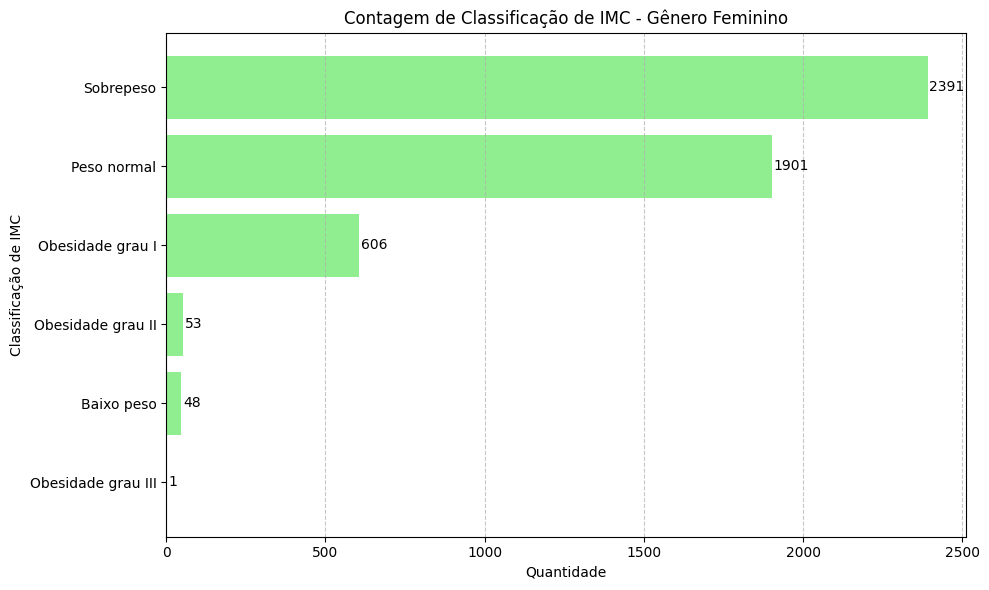

In [93]:
# Configurações do gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars_feminino = plt.barh(contagem_classificacao_feminino.index, contagem_classificacao_feminino, color='lightgreen')

# Adicionar rótulos de dados para cada barra feminina
for bar in bars_feminino:
    xval = bar.get_width()
    plt.text(xval + 5, bar.get_y() + bar.get_height()/2, str(int(xval)), va='center', ha='left', fontsize=10)

plt.title('Contagem de Classificação de IMC - Gênero Feminino')
plt.xlabel('Quantidade')
plt.ylabel('Classificação de IMC')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [94]:
# Contagem de valores para a classificação de IMC no gênero masculino
contagem_classificacao_masculino = masculino['Classificação'].value_counts()

In [95]:
# Ordenar as contagens do maior para o menor
contagem_classificacao_masculino = contagem_classificacao_masculino.sort_values(ascending=True)

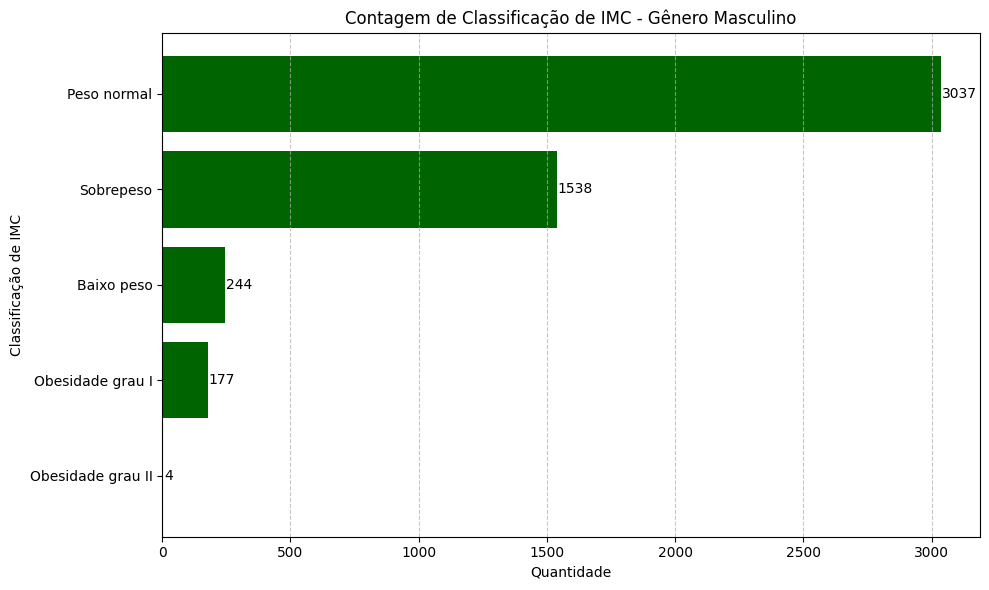

In [96]:
# Configurações do gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars_masculino = plt.barh(contagem_classificacao_masculino.index, contagem_classificacao_masculino, color='darkgreen')

# Adicionar rótulos de dados para cada barra masculina
for bar in bars_masculino:
    xval = bar.get_width()
    plt.text(xval + 5, bar.get_y() + bar.get_height()/2, str(int(xval)), va='center', ha='left', fontsize=10)

plt.title('Contagem de Classificação de IMC - Gênero Masculino')
plt.xlabel('Quantidade')
plt.ylabel('Classificação de IMC')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()